<a href="https://colab.research.google.com/github/pcsanguinetti/AIMadridSmart/blob/main/EDA_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.precision", 2)

In [ ]:
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [ ]:
#!pip install geopy 
#!pip install Nominatim

In [ ]:
'''
Geocode addresses - DISABLED

from geopy.geocoders import Nominatim
address='CALLE MINAS 9 MADRID'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))
'''

# Cleaning and exploring data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load datasets

df20 = pd.read_csv("/content/drive/My Drive/2020_Accident_Madrid.csv")
df19 = pd.read_csv("/content/drive/My Drive/2019_Accident_Madrid.csv")

In [ ]:
# unify datasets

df20.drop(columns=["Unnamed: 13", "Unnamed: 14"], inplace=True)
df20.rename(columns={"LESIVIDAD*":"LESIVIDAD",
                   "RANGO DE EDAD":"RANGO EDAD"},
                   inplace=True)
df19["AÑO"] = 2019
df20["AÑO"] = 2020

In [ ]:
# concatenate datasets 2019 - 2020

df = pd.concat([df19, df20], ignore_index=True)

In [ ]:
# add column with injury type

def grave(x):
  if x == 4.0:
    return "Fatal"
  elif x == 3.0:
    return "Grave"
  elif x == 77 or x == 14 or x == None:
    return "Sin atención"
  else:
    return "Leve"

df["GRAVEDAD"] = df["LESIVIDAD"].apply(grave)

In [ ]:
# add column with day of the week

def fecha(x):
  dia = int(x[0:2])
  mes = int(x[3:5])
  ano = int(x[-4:])
  fecha = datetime.date(ano,mes,dia)
  dia_semana = fecha.weekday()
  return dia_semana

df["DIA SEMANA"] = df["FECHA"].apply(fecha)

In [ ]:
# add column with accident time

df["HS"] = (df["HORA"].str[0:-3]).astype(int)

In [ ]:
df.columns

Index(['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO EDAD', 'SEXO', 'LESIVIDAD', 'AÑO', 'GRAVEDAD',
       'DIA SEMANA', 'HS'],
      dtype='object')

In [ ]:
# download new dataset

df.to_csv("/content/drive/My Drive/Accidentes2019-2020.csv")

# Visual exploration

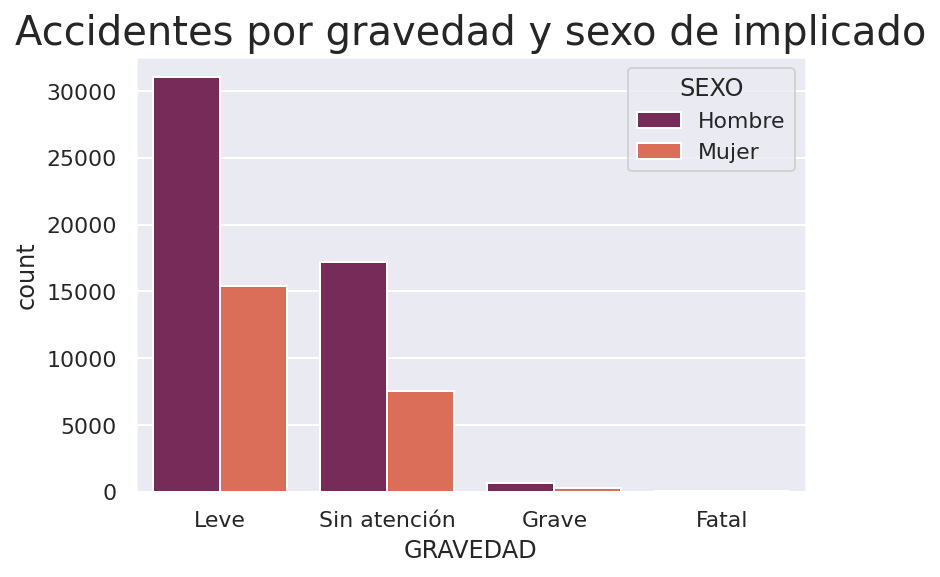

In [ ]:
sns.countplot(x="GRAVEDAD", data=df, hue="SEXO", palette="rocket")
plt.title('Accidentes por gravedad y sexo de implicado', fontsize=20)
plt.show()

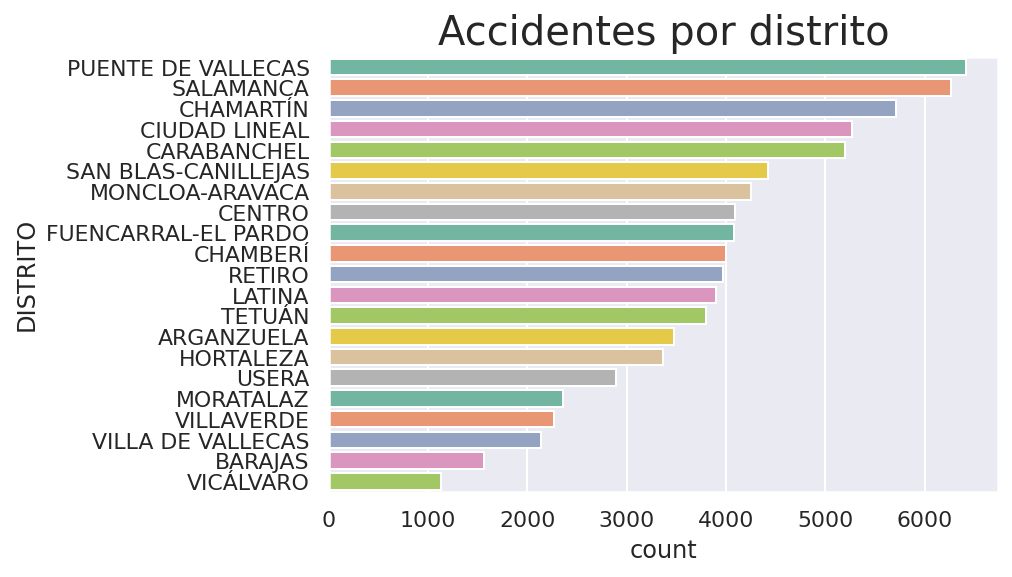

In [ ]:
sns.countplot(y="DISTRITO", data=df, palette="Set2", order = df['DISTRITO'].value_counts().index)
plt.title('Accidentes por distrito', fontsize=20)
plt.show()

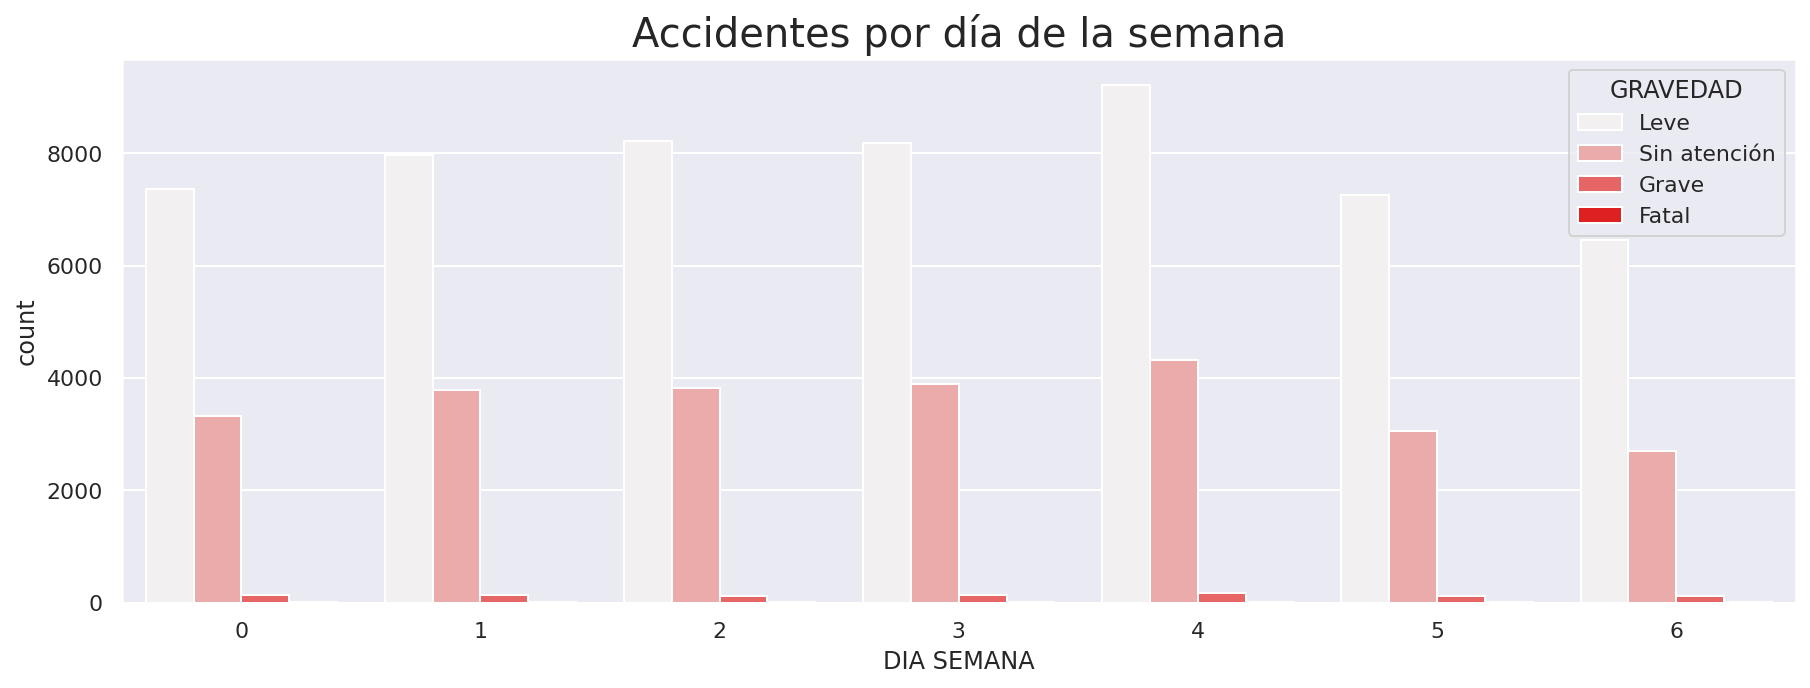

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x="DIA SEMANA", data=df, color="red", hue="GRAVEDAD", ax=ax)
plt.title('Accidentes por día de la semana', fontsize=20)
plt.show()

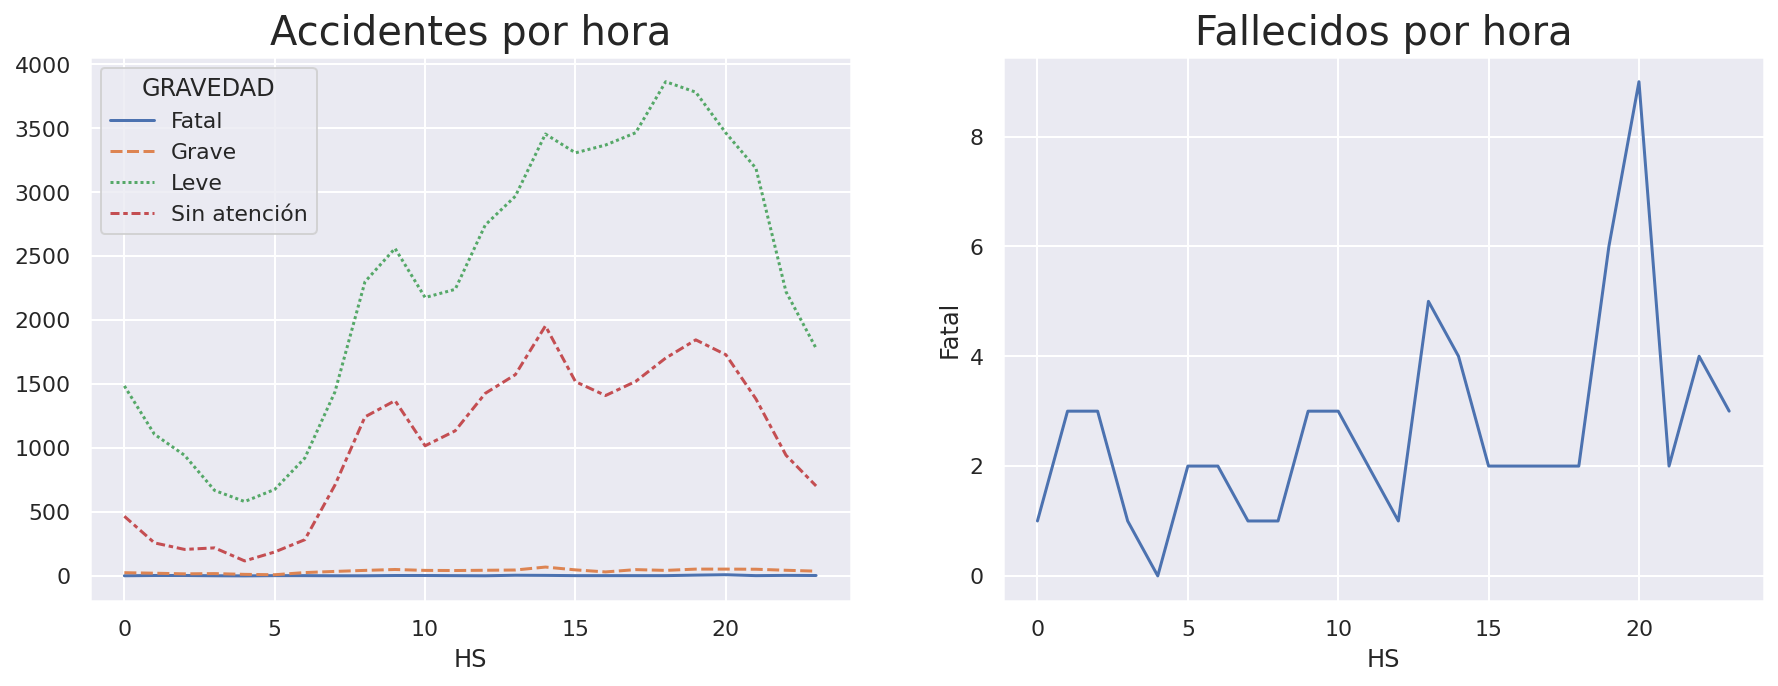

In [ ]:
hora_grave = pd.crosstab(df["HS"], df["GRAVEDAD"])
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(data=hora_grave["Fatal"], ax=ax[1])
sns.lineplot(data=hora_grave, ax=ax[0])
ax[0].set_title("Accidentes por hora", fontsize=20)
ax[1].set_title("Fallecidos por hora", fontsize=20)
plt.show()

In [ ]:
'''
LEYENDA DE CAMPO LESIVIDAD:

01 Atención en urgencias sin posterior ingreso. - LEVE
02 Ingreso inferior o igual a 24 horas - LEVE
03 Ingreso superior a 24 horas. - GRAVE
04 Fallecido 24 horas - FALLECIDO
05 Asistencia sanitaria ambulatoria con posterioridad - LEVE
06 Asistencia sanitaria inmediata en centro de salud o mutua - LEVE
07 Asistencia sanitaria sólo en el lugar del accidente - LEVE
14 Sin asistencia sanitaria
77 Se desconoce
En blanco Sin asistencia sanitaria
'''